In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
waist = 'Waist Circumference, Pref (mm)'
neck='Neck Base Circumference (mm)'
hip= 'Hip Circumference, Maximum (mm)'
chest='Chest Circumference (mm)' #measured just on nipples
crotch_height='Crotch Height (mm)'
shoe_size_italy="Shoe Size IT"

upper_chest='Chest Girth (Chest Circumference at Scye) (mm)' #measured above nipple
italy_upper_chest="Chest Girth at Scye (Chest Circumference at Scye) (mm)"
malleolus_height_outer="Ankle Ht Rt (Malleolus, Lateral) (mm)"
malleolus_height_inner='Malleolus Med Rt (mm)'
outer_inseam='Outer Inseam'


thigh='Thigh Circumference (mm)'
shoulder_breadth='Shoulder Breadth (mm)'
waist_floor='Waist Height, Preferred (mm)'
arm_length='Arm Length (Shoulder to Wrist) (mm)'

rectangle='Rectangle'
triangle='Triangle'
inverted_triangle='Inverted Triangle'

In [4]:
additional=pd.read_csv("additional_df.csv",encoding='utf-8')
additional.head()

,Subject Number,Pants Size Waist,shape
0,4052,37.4,Rectangle
1,4749,35.4,Triangle
2,16674,32,Rectangle
3,17049,32,Rectangle
4,16893,31,Rectangle


In [5]:
set=[]
set.append(measured_waist.tolist())
set.append(predicted_waist.tolist())
set.append(additional[pants_size].tolist())
print(len(set[1]))

NameError: name 'measured_waist' is not defined

In [ ]:
df = pd.DataFrame (set).transpose()
df.columns = ['Measured Waist', 'Predicted Waist','Reported Waist']
print(df['Reported Waist'])

/Users/nishantimalsena/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [ ]:
cleaned_df=df
# cleaned_df=cleaned_df[cleaned_df['Reported'].str.contains("Don't Know|29.5 or Smaller|63 or Larger")==False]
cleaned_df = cleaned_df[cleaned_df['Reported Waist'].str.contains("Don't Know") == False]
cleaned_df = cleaned_df[cleaned_df['Reported Waist'].str.contains("No Response") == False]
cleaned_df['Measured Waist']=pd.to_numeric(cleaned_df['Measured Waist'])
cleaned_df['Predicted Waist']=pd.to_numeric(cleaned_df['Predicted Waist'])
cleaned_df['Reported Waist']=pd.to_numeric(cleaned_df['Reported Waist'])

ValueError: Unable to parse string "63 or Larger" at position 12

In [ ]:
cleaned_df.head()

,Measured Waist,Predicted Waist,Reported Waist
0,35.196850,31.591038,34.0
1,31.732283,32.479991,33.5
2,29.724409,30.926266,29.5
3,33.503937,33.814719,30.0
4,30.787402,31.682807,35.4


<AxesSubplot:xlabel='Measured Waist', ylabel='Predicted Waist'>

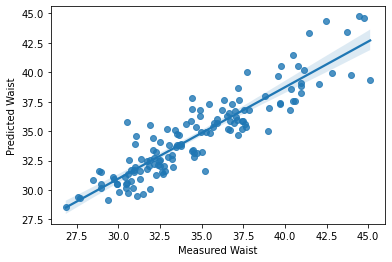

In [ ]:
sns.regplot( x="Measured Waist", y="Predicted Waist",data=cleaned_df)


In [ ]:
sns.regplot(data=cleaned_df, x="Measured Waist", y="Reported Waist")

NameError: name 'cleaned_df' is not defined

In [ ]:
chest_M=target[:,1]/25.4#convert chest to inches
chest_P=pred[:,1]/25.4


NameError: name 'target' is not defined

In [ ]:
set=[chest_M.tolist(),chest_P.tolist()]
chest_df = pd.DataFrame (set).transpose()
chest_df.columns = ['Measured Chest', 'Predicted Chest']


NameError: name 'chest_M' is not defined

In [ ]:
sns.regplot( x="Measured Chest", y="Predicted Chest",data=chest_df)

NameError: name 'chest_df' is not defined

In [ ]:
neck_M=target[:,2]/25.4#convert neck to inches
neck_P=pred[:,2]/25.4


NameError: name 'target' is not defined

In [ ]:
set=[neck_M.tolist(),neck_P.tolist()]
neck_df = pd.DataFrame (set).transpose()
neck_df.columns = ['Measured Neck', 'Predicted Neck']
sns.regplot( x="Measured Neck", y="Predicted Neck",data=neck_df)

NameError: name 'neck_M' is not defined

In [ ]:
hip_M=target[:,3]/25.4#convert neck to inches
hip_P=pred[:,3]/25.4


NameError: name 'target' is not defined

In [ ]:
set=[hip_M.tolist(),hip_P.tolist()]
hip_df = pd.DataFrame (set).transpose()
hip_df.columns = ['Measured Hip', 'Predicted Hip']
sns.regplot( x="Measured Hip", y="Predicted Hip",data=hip_df)

NameError: name 'hip_M' is not defined

In [ ]:
crotch_M=target[:,4]/25.4#convert neck to inches
crotch_P=pred[:,4]/25.4


NameError: name 'target' is not defined

In [ ]:
set=[crotch_M.tolist(),crotch_P.tolist()]
crotch_df = pd.DataFrame (set).transpose()
crotch_df.columns = ['Measured Crotch', 'Predicted Crotch']
sns.regplot( x="Measured Crotch", y="Predicted Crotch",data=crotch_df)

NameError: name 'crotch_M' is not defined

In [6]:
male_pred=pd.read_csv('./data/male/male_pred.csv',encoding='utf-8')
male_target=pd.read_csv('./data/male/male_target.csv')
male_pred_body_shape=pd.read_csv('./data/male/male_pred_without_shape.csv',encoding='utf-8')
male_target_body_shape=pd.read_csv('./data/male/male_target_without_shape.csv',encoding='utf-8')


In [7]:
def plot_box_two(arr_1,arr_2,column_1,column_2):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot([arr_1,arr_2])
    plt.xticks([1, 2], [column_1, column_2], rotation=10)
    plt.show()

In [8]:
def plot_error_distribution(array,title):
    plt.subplots(figsize=(8,4))
    #Set X-Axis range
    
    plt.title('Model Error Distribution:' + title)
    plt.ylabel('No. of Predictions')
    plt.xlabel('Error (cm)')
    plt.hist(array)
    plt.show()

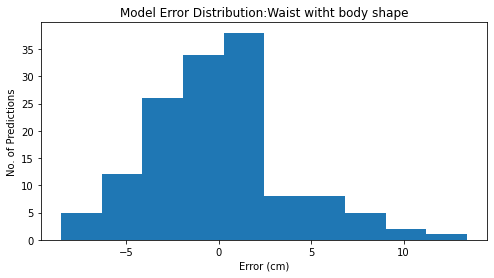

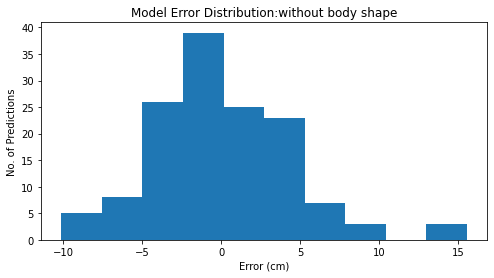

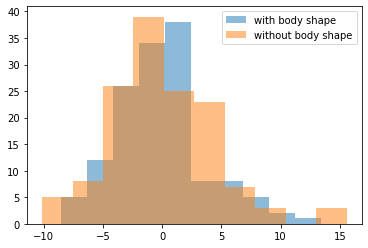

In [9]:
waist_target_arr=male_target[waist].to_numpy()
waist_pred_arr=male_pred[waist].to_numpy()
waist_error=(np.subtract(waist_target_arr,waist_pred_arr))
plot_error_distribution(waist_error,"Waist witht body shape")
#plot_box_two(waist_target_arr,waist_pred_arr,waist,"Waist Prediction")
# plot_box_two(waist_error,[],'Waist Error',"")

waist_target_arr=male_target_body_shape[waist].to_numpy()
waist_pred_arr=male_pred_body_shape[waist].to_numpy()
waist_error_u=(np.subtract(waist_target_arr,waist_pred_arr))
plot_error_distribution(waist_error_u,"without body shape")
# plot_box_two(waist_target_arr,waist_pred_arr,waist,"Waist Prediction")
plt.hist(waist_error, alpha=0.5)

plt.hist(waist_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_error_distribution(waist_error_u)
# plot_box_two(waist_target_arr,waist_pred_arr,waist,"Waist Prediction")


In [10]:

# plot_box_two(waist_error,[],'Waist Error',"")



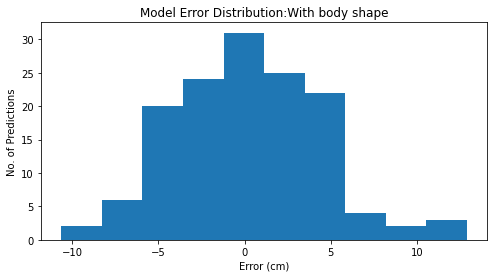

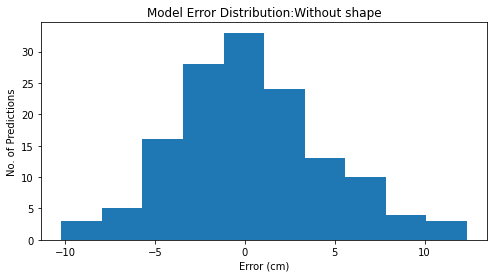

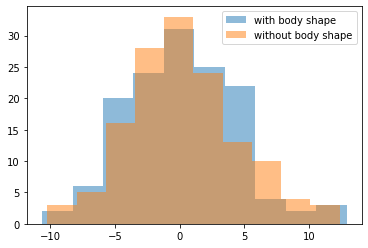

In [11]:
chest_target_arr=male_target[chest].to_numpy()
chest_pred_arr=male_pred[chest].to_numpy()
chest_error=(np.subtract(chest_target_arr,chest_pred_arr))
plot_error_distribution(chest_error,"With body shape")
# plot_box_two(chest_target_arr,chest_pred_arr,chest,'Chest Prediction')
# plot_box_two(chest_error,[],'Chest Error',"")

chest_target_arr=male_target_body_shape[chest].to_numpy()
chest_pred_arr=male_pred_body_shape[chest].to_numpy()
chest_error_u=(np.subtract(chest_target_arr,chest_pred_arr))
plot_error_distribution(chest_error_u,"Without shape")
plt.hist(chest_error, alpha=0.5)

plt.hist(chest_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(chest_target_arr,chest_pred_arr,chest,'Chest Prediction')

In [12]:
# chest_target_arr=male_target_body_shape[chest].to_numpy()
# chest_pred_arr=male_pred_body_shape[chest].to_numpy()
# chest_error=(np.subtract(chest_target_arr,chest_pred_arr))
# plot_error_distribution(chest_error)
# plot_box_two(chest_target_arr,chest_pred_arr,chest,'Chest Prediction')
# # plot_box_two(chest_error,[],'Chest Error',"")

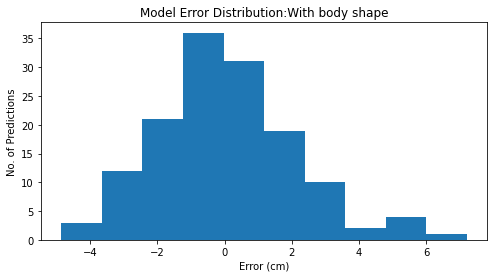

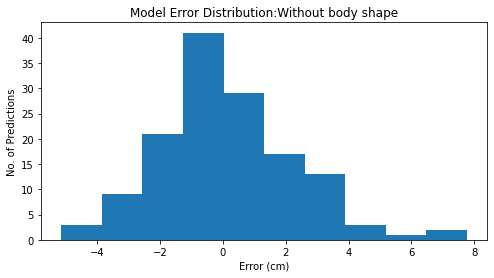

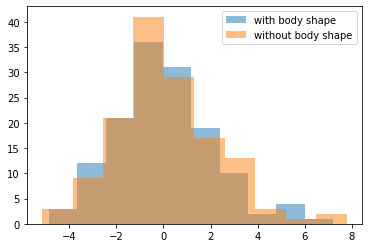

In [13]:
neck_target_arr=male_target[neck].to_numpy()
neck_pred_arr=male_pred[neck].to_numpy()
neck_error=(np.subtract(neck_target_arr,neck_pred_arr))
plot_error_distribution(neck_error,"With body shape")
# plot_box_two(neck_target_arr,neck_pred_arr,neck,'neck_pred')

neck_target_arr=male_target_body_shape[neck].to_numpy()
neck_pred_arr=male_pred_body_shape[neck].to_numpy()
neck_error_u=(np.subtract(neck_target_arr,neck_pred_arr))
plot_error_distribution(neck_error_u,"Without body shape")
plt.hist(neck_error, alpha=0.5)

plt.hist(neck_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(neck_target_arr,neck_pred_arr,neck,'neck_pred')
# plot_box_two(neck_error,[],'Neck Error',"")

In [14]:
# neck_target_arr=male_target_body_shape[neck].to_numpy()
# neck_pred_arr=male_pred_body_shape[neck].to_numpy()
# neck_error=(np.subtract(neck_target_arr,neck_pred_arr))
# plot_error_distribution(neck_error)
# plot_box_two(neck_target_arr,neck_pred_arr,neck,'neck_pred')
# plot_box_two(neck_error,[],'Neck Error',"")

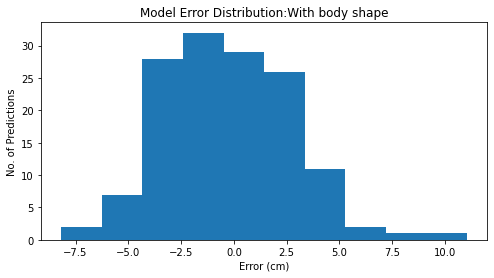

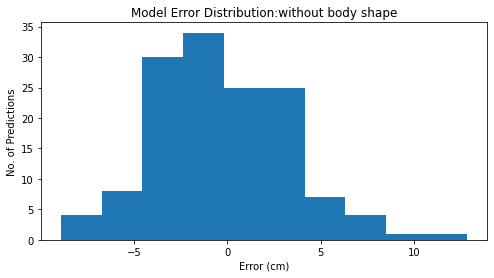

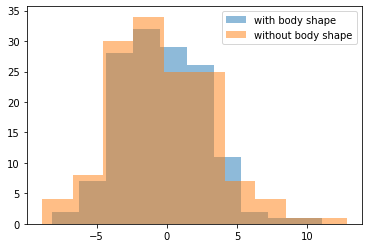

In [15]:
hip_target_arr=male_target[hip].to_numpy()
hip_pred_arr=male_pred[hip].to_numpy()
hip_error=(np.subtract(hip_target_arr,hip_pred_arr))
plot_error_distribution(hip_error,"With body shape")
# plot_box_two(hip_target_arr,hip_pred_arr,hip,"hip_pred")
# plot_box_two(hip_error,[],'Hip Error',"")

hip_target_arr=male_target_body_shape[hip].to_numpy()
hip_pred_arr=male_pred_body_shape[hip].to_numpy()
hip_error_u=(np.subtract(hip_target_arr,hip_pred_arr))
plot_error_distribution(hip_error_u,"without body shape")
plt.hist(hip_error, alpha=0.5)

plt.hist(hip_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(hip_target_arr,hip_pred_arr,hip,"hip_pred")
# plot_box_two(hip_error,[],'Hip Error',"")

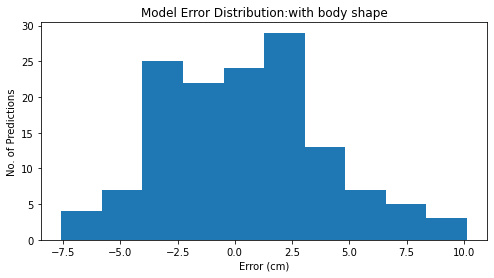

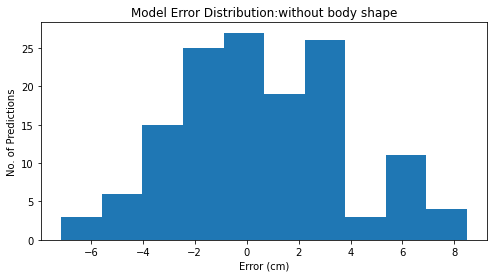

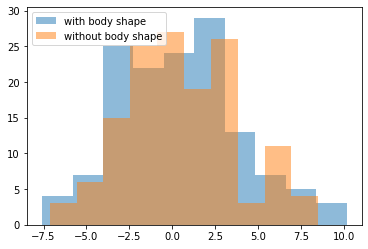

In [16]:
crotch_target_arr=male_target[crotch_height].to_numpy()
crotch_pred_arr=male_pred[crotch_height].to_numpy()
crotch_error=(np.subtract(crotch_target_arr,crotch_pred_arr))
plot_error_distribution(crotch_error,"with body shape")
# plot_box_two(crotch_target_arr,crotch_pred_arr,crotch_height,"crotch_height_pred")
# plot_box_two(crotch_error,[],'Crotch error',"")
crotch_target_arr=male_target_body_shape[crotch_height].to_numpy()
crotch_pred_arr=male_pred_body_shape[crotch_height].to_numpy()
crotch_error_u=(np.subtract(crotch_target_arr,crotch_pred_arr))
plot_error_distribution(crotch_error_u,"without body shape")
plt.hist(crotch_error, alpha=0.5)

plt.hist(crotch_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(crotch_target_arr,crotch_pred_arr,crotch_height,"crotch_height_pred")

In [17]:

# plot_box_two(crotch_error,[],'Crotch error',"")

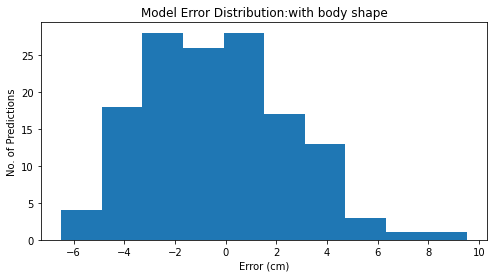

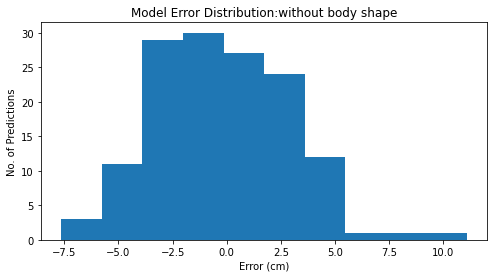

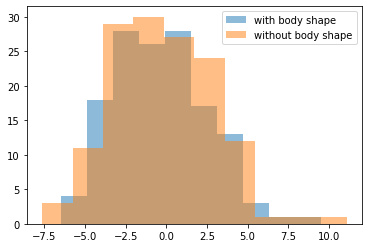

In [18]:
thigh_target_arr=male_target[thigh].to_numpy()
thigh_pred_arr=male_pred[thigh].to_numpy()
thigh_error=(np.subtract(thigh_target_arr,thigh_pred_arr))
plot_error_distribution(thigh_error,"with body shape")
# plot_box_two(thigh_target_arr,thigh_pred_arr,thigh,"thigh_pred")

thigh_target_arr=male_target_body_shape[thigh].to_numpy()
thigh_pred_arr=male_pred_body_shape[thigh].to_numpy()
thigh_error_u=(np.subtract(thigh_target_arr,thigh_pred_arr))
plot_error_distribution(thigh_error_u,"without body shape")
plt.hist(thigh_error, alpha=0.5)

plt.hist(thigh_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(thigh_target_arr,thigh_pred_arr,thigh,"thigh_pred")

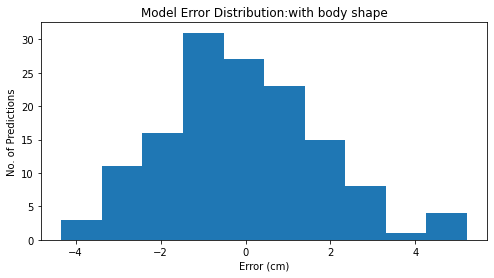

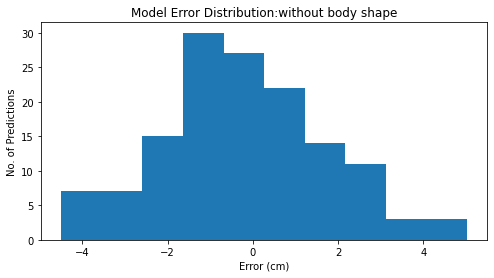

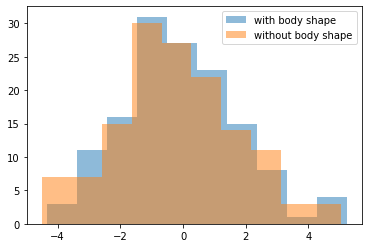

In [19]:

shoulder_target_arr=male_target[shoulder_breadth].to_numpy()
shoulder_pred_arr=male_pred[shoulder_breadth].to_numpy()
shoulder_error=(np.subtract(shoulder_target_arr,shoulder_pred_arr))
plot_error_distribution(shoulder_error,"with body shape")
# plot_box_two(shoulder_target_arr,shoulder_pred_arr,shoulder_breadth,"shoulder_breadth_pred")


shoulder_target_arr=male_target_body_shape[shoulder_breadth].to_numpy()
shoulder_pred_arr=male_pred_body_shape[shoulder_breadth].to_numpy()
shoulder_error_u=(np.subtract(shoulder_target_arr,shoulder_pred_arr))
plot_error_distribution(shoulder_error_u,"without body shape")
plt.hist(shoulder_error, alpha=0.5)

plt.hist(shoulder_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(shoulder_target_arr,shoulder_pred_arr,shoulder_breadth,"shoulder_breadth_pred")

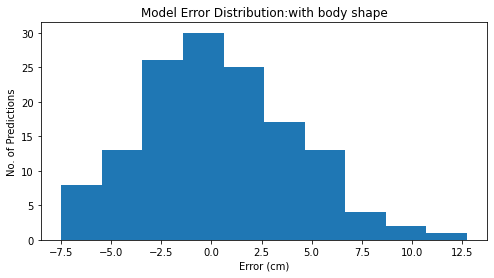

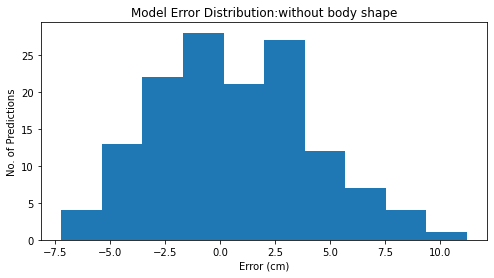

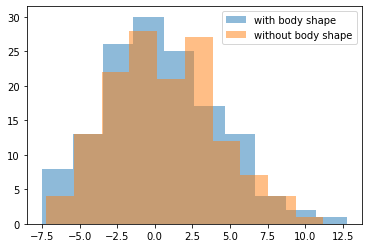

In [20]:

waist_floor_target_arr=male_target[waist_floor].to_numpy()
waist_floor_pred_arr=male_pred[waist_floor].to_numpy()
waist_floor_error=(np.subtract(waist_floor_target_arr,waist_floor_pred_arr))
plot_error_distribution(waist_floor_error,"with body shape")
# plot_box_two(waist_floor_target_arr,waist_floor_pred_arr,waist_floor,"waist_floor_pred")


waist_floor_target_arr=male_target_body_shape[waist_floor].to_numpy()
waist_floor_pred_arr=male_pred_body_shape[waist_floor].to_numpy()
waist_floor_error_u=(np.subtract(waist_floor_target_arr,waist_floor_pred_arr))
plot_error_distribution(waist_floor_error_u,"without body shape")
plt.hist(waist_floor_error, alpha=0.5)

plt.hist(waist_floor_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(waist_floor_target_arr,waist_floor_pred_arr,waist_floor,"waist_floor_pred")

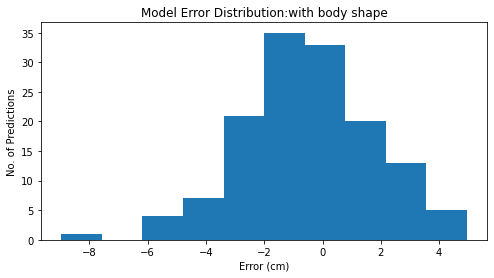

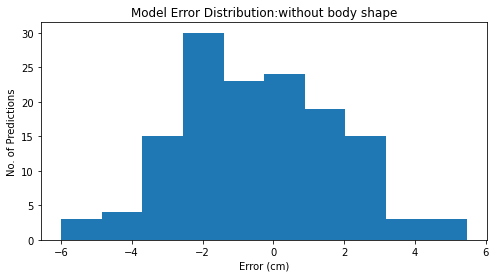

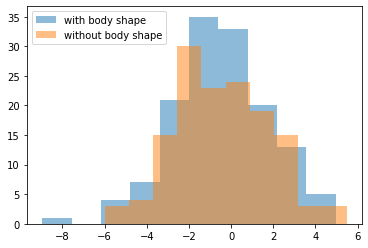

In [21]:

arm_target_arr=male_target[arm_length].to_numpy()
arm_pred_arr=male_pred[arm_length].to_numpy()
arm_error=(np.subtract(arm_target_arr,arm_pred_arr))
plot_error_distribution(arm_error,"with body shape")
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
# plot_box_two(arm_error,[],'Shoulder error',"")


arm_target_arr=male_target_body_shape[arm_length].to_numpy()
arm_pred_arr=male_pred_body_shape[arm_length].to_numpy()
arm_error_u=(np.subtract(arm_target_arr,arm_pred_arr))
plot_error_distribution(arm_error_u,"without body shape")
plt.hist(arm_error, alpha=0.5)

plt.hist(arm_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
 


In [22]:

# plot_box_two(arm_error,[],'Shoulder error',"")


 


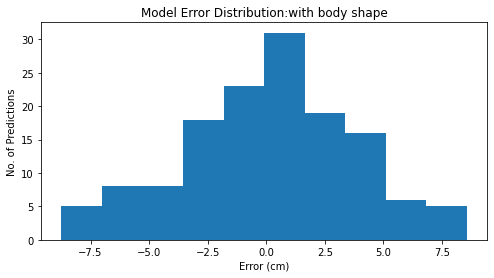

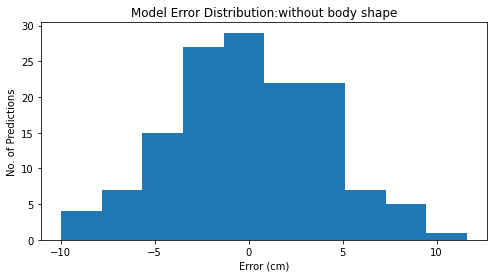

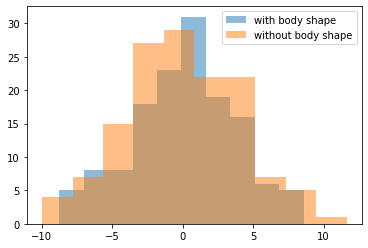

In [23]:

upper_chest_target_arr=male_target[upper_chest].to_numpy()
upper_chest_pred_arr=male_pred[upper_chest].to_numpy()
upper_chest_error=(np.subtract(upper_chest_target_arr,upper_chest_pred_arr))
plot_error_distribution(upper_chest_error,"with body shape")
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
# plot_box_two(arm_error,[],'Shoulder error',"")


upper_chest_target_arr=male_target_body_shape[upper_chest].to_numpy()
upper_chest_pred_arr=male_pred_body_shape[upper_chest].to_numpy()
upper_chest_error_u=(np.subtract(upper_chest_target_arr,upper_chest_pred_arr))
plot_error_distribution(upper_chest_error_u,"without body shape")
plt.hist(upper_chest_error, alpha=0.5)

plt.hist(upper_chest_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])

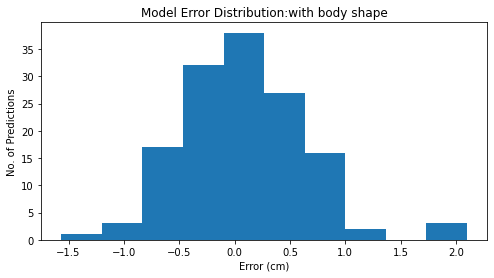

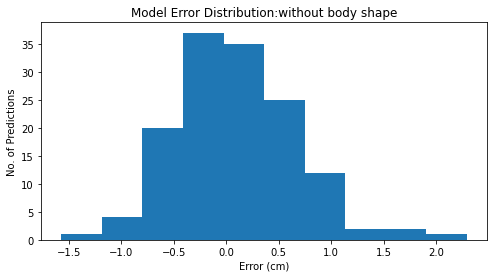

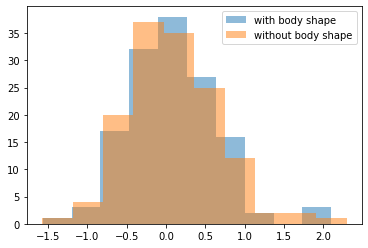

In [24]:

malleolus_outer_target_arr=male_target[malleolus_height_outer].to_numpy()
malleolus_outer_pred_arr=male_pred[malleolus_height_outer].to_numpy()
malleolus_outer_error=(np.subtract(malleolus_outer_target_arr,malleolus_outer_pred_arr))
plot_error_distribution(malleolus_outer_error,"with body shape")
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
# plot_box_two(arm_error,[],'Shoulder error',"")


malleolus_outer_target_arr=male_target_body_shape[malleolus_height_outer].to_numpy()
malleolus_outer_pred_arr=male_pred_body_shape[malleolus_height_outer].to_numpy()
malleolus_outer_error_u=(np.subtract(malleolus_outer_target_arr,malleolus_outer_pred_arr))
plot_error_distribution(malleolus_outer_error_u,"without body shape")
plt.hist(malleolus_outer_error, alpha=0.5)

plt.hist(malleolus_outer_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])

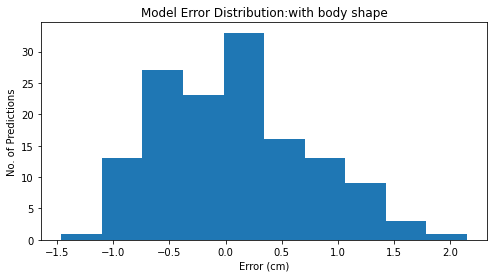

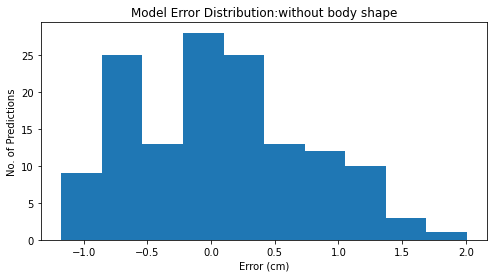

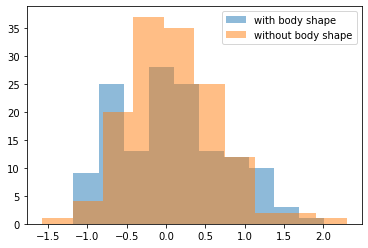

In [25]:

malleolus_inner_target_arr=male_target[malleolus_height_inner].to_numpy()
malleolus_inner_pred_arr=male_pred[malleolus_height_inner].to_numpy()
malleolus_inner_error=(np.subtract(malleolus_inner_target_arr,malleolus_inner_pred_arr))
plot_error_distribution(malleolus_inner_error,"with body shape")
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
# plot_box_two(arm_error,[],'Shoulder error',"")


malleolus_inner_target_arr=male_target_body_shape[malleolus_height_inner].to_numpy()
malleolus_inner_pred_arr=male_pred_body_shape[malleolus_height_inner].to_numpy()
malleolus_inner_error_u=(np.subtract(malleolus_inner_target_arr,malleolus_inner_pred_arr))
plot_error_distribution(malleolus_inner_error_u,"without body shape")
plt.hist(malleolus_inner_error_u, alpha=0.5)

plt.hist(malleolus_outer_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])